In [ ]:
import json
import pickle
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
#load the json file
with open('/content/sample_data/intents.json') as file:
    data = json.load(file)
print(data)

{'intents': [{'tag': 'greeting', 'patterns': ['Hi', 'Hey', 'Is anyone there?', 'Hi there', 'Hello', 'Hey there', 'Howdy', 'Hola', 'Bonjour', 'Konnichiwa', 'Guten tag', 'Ola'], 'responses': ['Hello there. Tell me how are you feeling today?', 'Hi there. What brings you here today?', 'Hi there. How are you feeling today?', 'Great to see you. How do you feel currently?', "Hello there. Glad to see you're back. What's going on in your world right now?"]}, {'tag': 'morning', 'patterns': ['Good morning'], 'responses': ["Good morning. I hope you had a good night's sleep. How are you feeling today? "]}, {'tag': 'afternoon', 'patterns': ['Good afternoon'], 'responses': ['Good afternoon. How is your day going?']}, {'tag': 'evening', 'patterns': ['Good evening'], 'responses': ['Good evening. How has your day been?']}, {'tag': 'night', 'patterns': ['Good night'], 'responses': ['Good night. Get some proper sleep', 'Good night. Sweet dreams.']}, {'tag': 'angry', 'patterns': [], 'responses': ['Keep cal

In [ ]:
training_sentences = []
training_labels = []
labels = []
responses = []

for intent in data['intents']:
    for pattern in intent['patterns']:
        training_sentences.append(pattern)
        training_labels.append(intent['tag'])
    responses.append(intent['responses'])

    if intent['tag'] not in labels:
        labels.append(intent['tag'])
print("Training labels: ",training_labels)
print("Labels: ",labels)

Training labels:  ['greeting', 'greeting', 'greeting', 'greeting', 'greeting', 'greeting', 'greeting', 'greeting', 'greeting', 'greeting', 'greeting', 'greeting', 'morning', 'afternoon', 'evening', 'night', 'goodbye', 'goodbye', 'goodbye', 'goodbye', 'goodbye', 'goodbye', 'goodbye', 'goodbye', 'thanks', 'thanks', 'thanks', 'thanks', 'thanks', 'no-response', 'neutral-response', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'about', 'skill', 'creation', 'creation', 'creation', 'name', 'name', 'name', 'help', 'help', 'help', 'help', 'help', 'help', 'help', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'stressed', 'stressed', 'stressed', 'stressed', 'stressed', 'worthless', 'worthless', 'worthless', 'worthless', 'worthless', 'depressed', 'depressed', 'depressed', 'depressed', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'casual', 'casual', 'casual', 'casual', 'casual', 'casual', 'casual', 'casual', 'casual', 'casual', 'casual', 'anxious', 'anxio

In [ ]:
num_classes = len(labels)
lbl_encoder = LabelEncoder()
lbl_encoder.fit(training_labels)
training_labels = lbl_encoder.transform(training_labels)
print(training_labels)

[44 44 44 44 44 44 44 44 44 44 44 44 55  1 10 58 43 43 43 43 43 43 43 43
 73 73 73 73 73 60 57  0  0  0  0  0  0  0  0 67  5  5  5 56 56 56 48 48
 48 48 48 48 48 65 65 65 65 65 65 65 65 70 70 70 70 70 78 78 78 78 78  8
  8  8  8 45 45 45 45 45 45 45  4  4  4  4  4  4  4  4  4  4  4  2  2 61
 61 61 61 68 68 68 68 68 68 66 66 66 66  6  6  6  6  6  6 74 74 74 74 74
 74  9  9  9  9  9 72 72 72 72 72 47 47 47 46 46 46  7  7  7  7  7  7  7
  7 49 49 64 64 64 79 79 79 79 71 71 71 71 52 52 52 69 69 69 69 42  3 63
 63 59 59 59 51 51 51 76 76 53 53 77 77 62 75 75 75 50 50 50 54 54 11 11
 22 22 33 33 37 37 37 37 38 38 39 39 39 40 41 12 13 14 15 16 17 18 19 20
 21 23 24 25 26 27 28 29 29 30 31 32 34 35 36 36]


In [ ]:
#text-preprocessing
vocab_size = 1000
embedding_dim = 16
max_len = 20
oov_token = "<OOV>" #to replace words out of vocabulary
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_token)
tokenizer.fit_on_texts(training_sentences) 
word_index = tokenizer.word_index
print("Word index: ",word_index)
sequences = tokenizer.texts_to_sequences(training_sentences) #convert text to sequence of integer
print("Sequences: ",sequences)
padded_sequences = pad_sequences(sequences, truncating = 'post', maxlen = max_len) #pad all texts into a uniform length.
print("Padded Sequences: ",padded_sequences)

Word index:  {'<OOV>': 1, 'i': 2, 'you': 3, 'what': 4, 'mental': 5, 'to': 6, 'about': 7, 'me': 8, 'health': 9, 'am': 10, 'can': 11, 'feel': 12, 'are': 13, 'do': 14, 'is': 15, 'my': 16, 'a': 17, "don't": 18, 'for': 19, 'the': 20, 'so': 21, 'have': 22, "i'm": 23, 'want': 24, 'how': 25, 'of': 26, 'that': 27, 'know': 28, "can't": 29, 'it': 30, 'depression': 31, 'myself': 32, 'help': 33, 'who': 34, 'tell': 35, 'more': 36, 'need': 37, 'like': 38, 'where': 39, 'learn': 40, 'if': 41, 'there': 42, 'good': 43, 'no': 44, 'not': 45, 'talk': 46, "you're": 47, 'would': 48, 'problems': 49, 'and': 50, 'illness': 51, 'ok': 52, 'much': 53, 'name': 54, 'go': 55, 'lonely': 56, 'stressed': 57, 'because': 58, 'away': 59, 'some': 60, 'all': 61, 'else': 62, 'exams': 63, 'something': 64, 'therapy': 65, 'find': 66, 'difference': 67, 'between': 68, 'bye': 69, 'thank': 70, "that's": 71, 'very': 72, 'nothing': 73, 'yourself': 74, 'your': 75, 'should': 76, "what's": 77, 'support': 78, 'out': 79, 'depressed': 80, 't

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy','poisson',tf.keras.metrics.KLDivergence(),tf.keras.metrics.CategoricalAccuracy()])
           
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 16)            16000     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 81)                1377      
                                                                 
Total params: 17,921
Trainable params: 17,921
Non-trainable params: 0
____________________________________________________

In [ ]:
epochs = 500
history_m1 = model.fit(padded_sequences, np.array(training_labels), epochs = epochs)

Epoch 1/500
8/8 [==============================] - 1s 5ms/step - loss: 4.3944 - accuracy: 0.0259 - poisson: 185.6222 - kullback_leibler_divergence: 343.6793 - categorical_accuracy: 0.0000e+00
Epoch 2/500
8/8 [==============================] - 0s 4ms/step - loss: 4.3882 - accuracy: 0.0474 - poisson: 185.6234 - kullback_leibler_divergence: 343.6814 - categorical_accuracy: 0.0000e+00
Epoch 3/500
8/8 [==============================] - 0s 4ms/step - loss: 4.3831 - accuracy: 0.0517 - poisson: 185.6272 - kullback_leibler_divergence: 343.6884 - categorical_accuracy: 0.0000e+00
Epoch 4/500
8/8 [==============================] - 0s 4ms/step - loss: 4.3773 - accuracy: 0.0517 - poisson: 185.6344 - kullback_leibler_divergence: 343.7019 - categorical_accuracy: 0.0000e+00
Epoch 5/500
8/8 [==============================] - 0s 4ms/step - loss: 4.3703 - accuracy: 0.0517 - poisson: 185.6481 - kullback_leibler_divergence: 343.7268 - categorical_accuracy: 0.0000e+00
Epoch 6/500
8/8 [=======================

Text(0.5, 1.0, 'Loss curve')

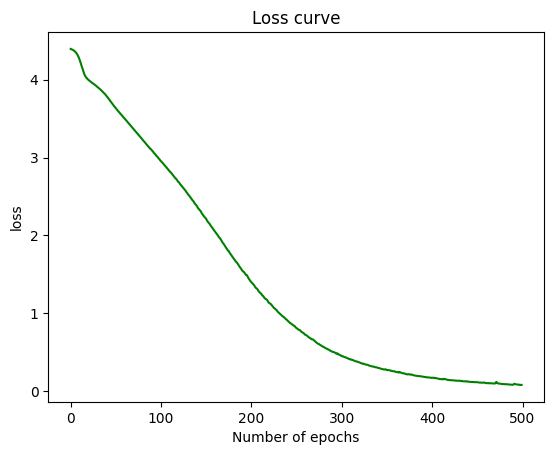

In [ ]:
loss_train = history_m1.history['loss']
epochs=range(500,)
plt.xlabel("Number of epochs")
plt.ylabel("loss")
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.title("Loss curve")

Text(0.5, 1.0, 'Accuracy and number of epochs')

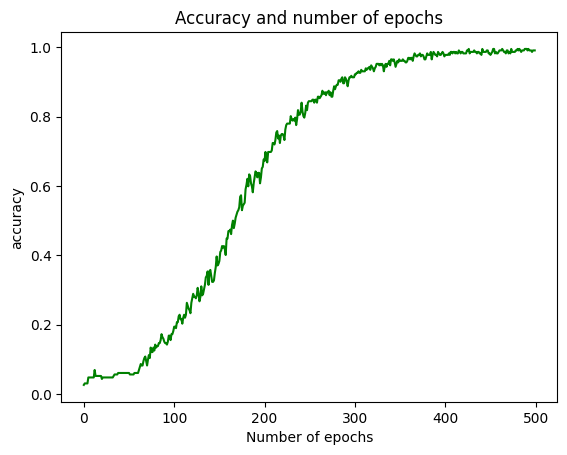

In [ ]:
acc = history_m1.history['accuracy']
epochs=range(500,)
plt.xlabel("Number of epochs")
plt.ylabel("accuracy")
plt.plot(epochs, acc, 'g', label='Training loss')
plt.title("Accuracy and number of epochs")

In [ ]:
#model2
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
#LSTM layer with 128 internal units
model.add(layers.LSTM(128))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy','poisson',tf.keras.metrics.KLDivergence(),tf.keras.metrics.CategoricalAccuracy()]) 
           
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 16)            16000     
                                                                 
 lstm (LSTM)                 (None, 128)               74240     
                                                                 
 dense_3 (Dense)             (None, 16)                2064      
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 81)                1377      
                                                                 
Total params: 93,953
Trainable params: 93,953
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 500
history_m2 = model.fit(padded_sequences, np.array(training_labels), epochs = epochs)

Epoch 1/500
8/8 [==============================] - 3s 35ms/step - loss: 4.3932 - accuracy: 0.0172 - poisson: 185.6223 - kullback_leibler_divergence: 343.6793 - categorical_accuracy: 0.0000e+00
Epoch 2/500
8/8 [==============================] - 0s 35ms/step - loss: 4.3837 - accuracy: 0.0172 - poisson: 185.6390 - kullback_leibler_divergence: 343.7109 - categorical_accuracy: 0.0000e+00
Epoch 3/500
8/8 [==============================] - 0s 37ms/step - loss: 4.3556 - accuracy: 0.0172 - poisson: 185.9838 - kullback_leibler_divergence: 344.3314 - categorical_accuracy: 0.0000e+00
Epoch 4/500
8/8 [==============================] - 0s 33ms/step - loss: 4.3073 - accuracy: 0.0172 - poisson: 189.2546 - kullback_leibler_divergence: 350.4151 - categorical_accuracy: 0.0000e+00
Epoch 5/500
8/8 [==============================] - 0s 34ms/step - loss: 4.2849 - accuracy: 0.0172 - poisson: 188.0600 - kullback_leibler_divergence: 348.2077 - categorical_accuracy: 0.0000e+00
Epoch 6/500
8/8 [==================

Text(0.5, 1.0, 'Loss curve')

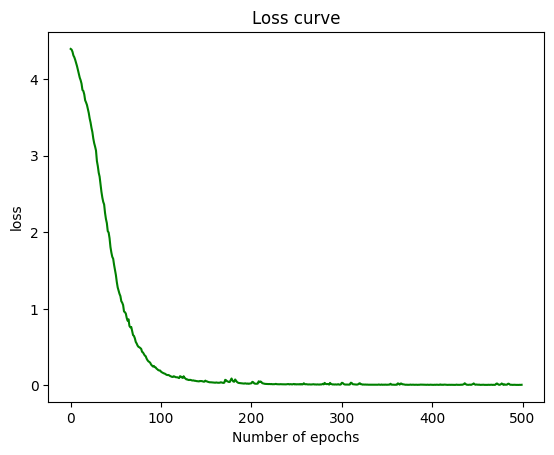

In [ ]:
loss_train = history_m2.history['loss']
epochs=range(500,)
plt.xlabel("Number of epochs")
plt.ylabel("loss")
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.title("Loss curve")

Text(0.5, 1.0, 'Accuracy and number of epochs')

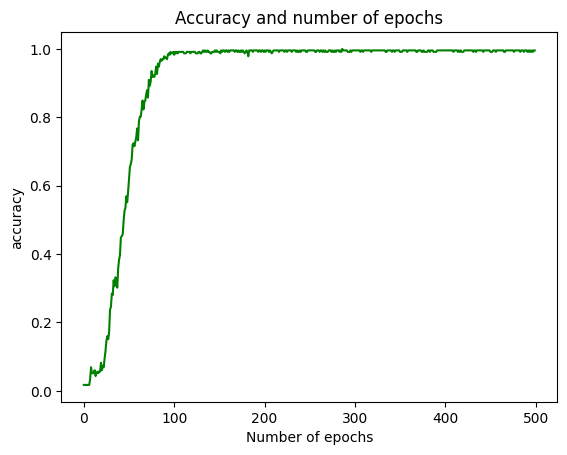

In [ ]:
acc = history_m2.history['accuracy']
epochs=range(500,)
plt.xlabel("Number of epochs")
plt.ylabel("accuracy")
plt.plot(epochs, acc, 'g', label='Training loss')
plt.title("Accuracy and number of epochs")

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len)) #converts each word into a fixed length vector 
model.add(Bidirectional(tf.keras.layers.LSTM(64))),
model.add(Dense(16, activation='relu')) #rectified linear unit 
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax')) #output layer
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy','poisson',tf.keras.metrics.KLDivergence(),tf.keras.metrics.CategoricalAccuracy()]) 
           
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 16)            16000     
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              41472     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 16)                2064      
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 81)                1377      
                                                                 
Total params: 61,185
Trainable params: 61,185
Non-trainable params: 0
__________________________________________________

In [ ]:
epochs = 500
history_m3 = model.fit(padded_sequences, np.array(training_labels), epochs = epochs)

Epoch 1/500
8/8 [==============================] - 5s 21ms/step - loss: 4.3922 - accuracy: 0.0129 - poisson: 185.6294 - kullback_leibler_divergence: 343.6919 - categorical_accuracy: 0.0000e+00
Epoch 2/500
8/8 [==============================] - 0s 23ms/step - loss: 4.3825 - accuracy: 0.0345 - poisson: 185.6645 - kullback_leibler_divergence: 343.7583 - categorical_accuracy: 0.0000e+00
Epoch 3/500
8/8 [==============================] - 0s 20ms/step - loss: 4.3712 - accuracy: 0.0345 - poisson: 185.9542 - kullback_leibler_divergence: 344.2992 - categorical_accuracy: 0.0000e+00
Epoch 4/500
8/8 [==============================] - 0s 20ms/step - loss: 4.3397 - accuracy: 0.0345 - poisson: 187.1999 - kullback_leibler_divergence: 346.5945 - categorical_accuracy: 0.0000e+00
Epoch 5/500
8/8 [==============================] - 0s 24ms/step - loss: 4.3211 - accuracy: 0.0345 - poisson: 187.9201 - kullback_leibler_divergence: 347.9238 - categorical_accuracy: 0.0000e+00
Epoch 6/500
8/8 [==================

Text(0.5, 1.0, 'Loss curve')

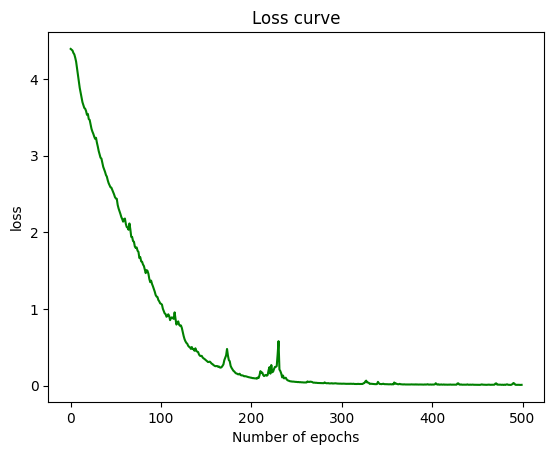

In [ ]:
loss_train = history_m3.history['loss']
epochs=range(500,)
plt.xlabel("Number of epochs")
plt.ylabel("loss")
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.title("Loss curve")

Text(0.5, 1.0, 'Accuracy and number of epochs')

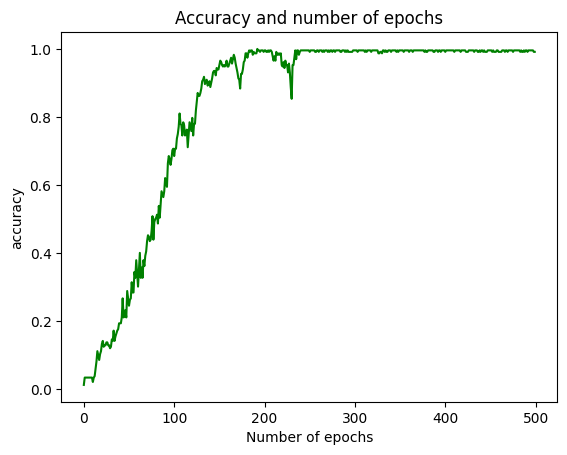

In [ ]:
acc = history_m3.history['accuracy']
epochs=range(500,)
plt.xlabel("Number of epochs")
plt.ylabel("accuracy")
plt.plot(epochs, acc, 'g', label='Training loss')
plt.title("Accuracy and number of epochs")